In [31]:
install.packages("rlang")
install.packages("tidymodels")
library(tidymodels)
library(tidyverse)
library(stringr)
library (httr)
library(tidyverse)
library(ggplot2)

Installing package into 'C:/Users/rabhi/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rabhi\AppData\Local\R\win-library\4.2\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\rabhi\AppData\Local\R\win-library\4.2\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"



The downloaded binary packages are in
	C:\Users\rabhi\AppData\Local\Temp\RtmpshjYf8\downloaded_packages


Warning message:
"package 'tidymodels' is in use and will not be installed"


In [8]:
# Data Wrangling using Tidyverse library.

# Importing the csv file into a dataframe.
bike_sharing_df = read_csv("raw_seoul_bike_sharing.csv") 

summary(bike_sharing_df)    #Observing the Columns of the data and changes needed to be done.

# Detecting and Handeling missing values.
# Droping rows with `RENTED_BIKE_COUNT` column == NA
bike_sharing_df = bike_sharing_df  %>% drop_na('RENTED_BIKE_COUNT')

# Calculating the summer average temperature and Imputing missing values for TEMPERATURE column with summer average temperature.
mean_summer = bike_sharing_df %>% filter(SEASONS == 'Summer') %>% summarise(mean_temp = mean(TEMPERATURE, na.rm=T))

bike_sharing_df = bike_sharing_df %>% mutate(TEMPERATURE = ifelse(is.na(TEMPERATURE) == T, mean_summer$mean_temp, TEMPERATURE))

# Saving the dataset as `seoul_bike_sharing.csv`
write.csv(bike_sharing_df,"Seoul_bike_sharing.csv")

# Using mutate() function and as.character to convert HOUR column into character type .
bike_sharing_df = bike_sharing_df %>% mutate(Hour = as.character(Hour))

# Converting SEASONS, HOLIDAY, FUNCTIONING_DAY, and HOUR columns into indicator
bike_sharing_df = data.frame(bike_sharing_df[! colnames(bike_sharing_df) %in% c('SEASONS','HOLIDAY','Hour')],model.matrix( ~ SEASONS - 1, bike_sharing_df),model.matrix( ~ HOLIDAY - 1, bike_sharing_df),model.matrix( ~ Hour - 1, bike_sharing_df)) #This is helpful as our dataset becomes less complex.

# Saving the dataset as `seoul_bike_sharing_converted.csv`
write_csv(bike_sharing_df, "seoul_bike_sharing_converted.csv")

# Using the `mutate()` function to apply min-max normalization on columns 
# `RENTED_BIKE_COUNT`, `TEMPERATURE`, `HUMIDITY`, `WIND_SPEED`, `VISIBILITY`, `DEW_POINT_TEMPERATURE`, `SOLAR_RADIATION`, `RAINFALL`, `SNOWFALL`
norm = function(x){(x-min(x))/(max(x)-min(x))}
bike_sharing_df = bike_sharing_df %>% mutate(RENTED_BIKE_COUNT = norm(RENTED_BIKE_COUNT),
                                             TEMPERATURE = norm(TEMPERATURE),
                                             HUMIDITY = norm(HUMIDITY),
                                             WIND_SPEED = norm(WIND_SPEED),
                                             Visibility = norm(Visibility),
                                             DEW_POINT_TEMPERATURE = norm(DEW_POINT_TEMPERATURE),
                                             SOLAR_RADIATION = norm(SOLAR_RADIATION),
                                             RAINFALL = norm(RAINFALL),
                                             Snowfall = norm(Snowfall))

# Saving the dataset as `seoul_bike_sharing_converted_normalized.csv`.
write_csv(bike_sharing_df, "seoul_bike_sharing_converted_normalized.csv")

# Standardizing the column names again for the new datasets.
dataset_list = c('seoul_bike_sharing.csv', 'seoul_bike_sharing_converted.csv', 'seoul_bike_sharing_converted_normalized.csv')

for (dataset_name in dataset_list)
{
    # Read dataset
    dataset <- read_csv(dataset_name)
    # Standardized its columns:
    # Convert all columns names to uppercase
    names(dataset) <- toupper(names(dataset))
    # Replace any white space separators by underscore, using str_replace_all function
    names(dataset) <- str_replace_all(names(dataset), " ", "_")
    # Save the dataset back
    write.csv(dataset, dataset_name, row.names=FALSE)
}

Rows: 8760 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Date, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (10): RENTED_BIKE_COUNT, Hour, TEMPERATURE, HUMIDITY, WIND_SPEED, Visibi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


     Date           RENTED_BIKE_COUNT      Hour        TEMPERATURE    
 Length:8760        Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 214.0    1st Qu.: 5.75   1st Qu.:  3.40  
 Mode  :character   Median : 542.0    Median :11.50   Median : 13.70  
                    Mean   : 729.2    Mean   :11.50   Mean   : 12.87  
                    3rd Qu.:1084.0    3rd Qu.:17.25   3rd Qu.: 22.50  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
                    NA's   :295                       NA's   :11      
    HUMIDITY       WIND_SPEED      Visibility   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940   1st Qu.: -4.700      
 Median :57.00   Median :1.500   Median :1698   Median :  5.100      
 Mean   :58.23   Mean   :1.725   Mean   :1437   Mean   :  4.074      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 14.800      
 Max.   :98.

New names:
• `` -> `...1`
Rows: 8465 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Date, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (11): ...1, RENTED_BIKE_COUNT, Hour, TEMPERATURE, HUMIDITY, WIND_SPEED, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Date, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, Visibility, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Date, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMP

In [2]:
# Exploratory Data Analysis with tidyverse and ggplot2
# Loading Data
seoul_bike_sharing <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing.csv"  
sbs_df = read.csv(seoul_bike_sharing) # Reading the CSV file.
dim(sbs_df) # Checking the dimensions of our dataset.

# Recasting DATE column as a date using the format "%d/%m/%Y".
sbs_df$DATE = as.Date(sbs_df$DATE,"%d/%m/%Y")
str(sbs_df) # Checking the dataset for the types

# Casting HOUR as a categorical variable with Order.
hour_level=unique(sbs_df$HOUR) # Getting the variables for the level. 
sbs_df$HOUR = factor(sbs_df$HOUR,ordered= TRUE,level=hour_level ) # Converting it into factor.
str(sbs_df$HOUR) # Checking the datatype of the HOUR column.

# Checking for the missing values.
sum(is.na(sbs_df)) # We get zero suggesting we dont have any missing values.


[1] 8465   14

'data.frame':	8465 obs. of  14 variables:
 $ DATE                 : Date, format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : int  254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : int  0 1 2 3 4 5 6 7 8 9 ...
 $ TEMPERATURE          : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : int  37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ DEW_POINT_TEMPERATURE: num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ HOLIDAY              : chr  "No Holiday" "No Holiday" "No Holiday" "No Holiday" ...
 $ FUNCTIONING_DAY      : chr  

[1] 0

SEASONS,RAINFALL,SNOWFALL
<chr>,<dbl>,<dbl>
Autumn,227.9,123.0
Spring,403.8,0.0
Summer,559.7,0.0
Winter,70.9,534.6


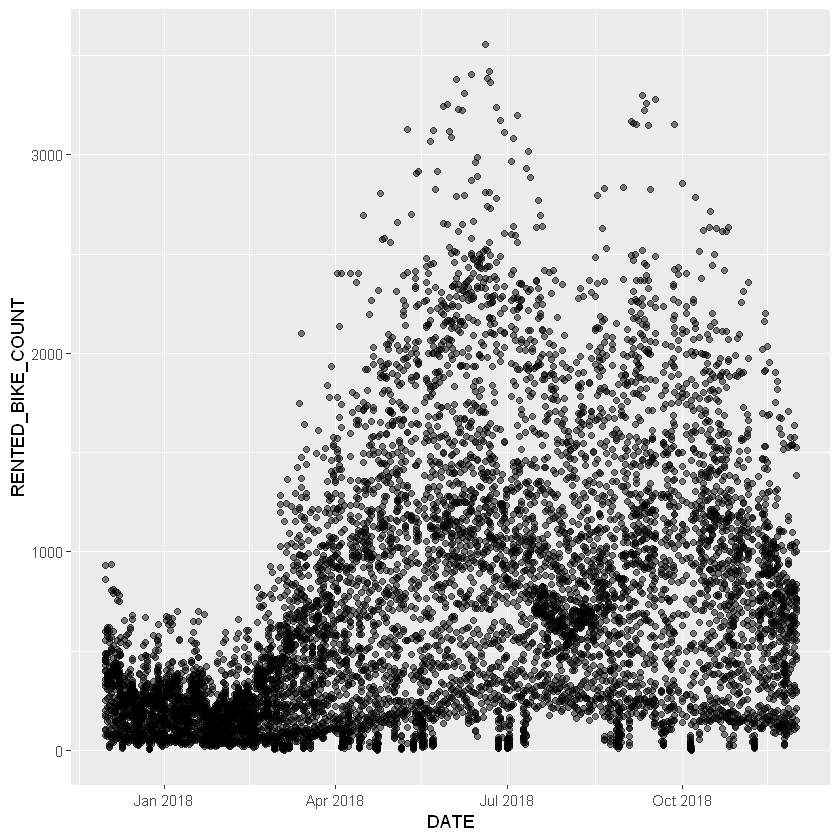

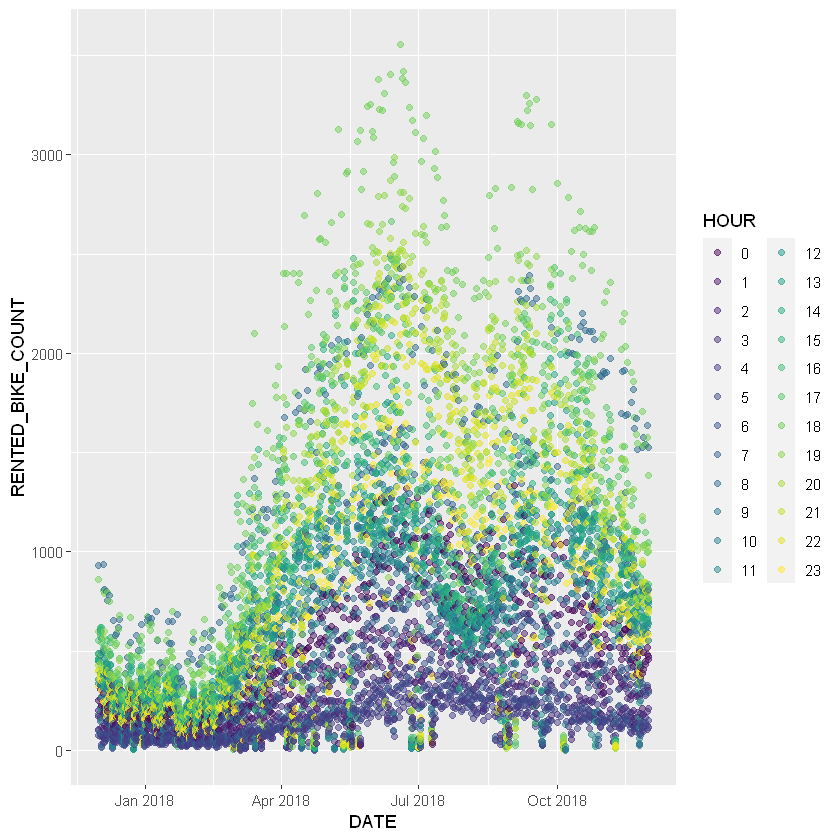

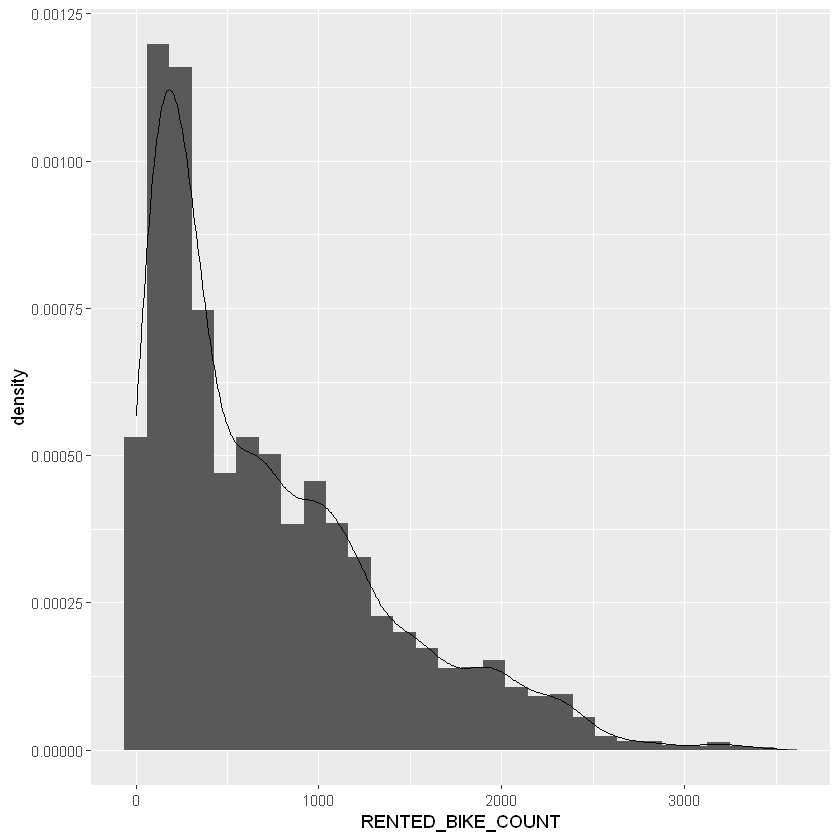

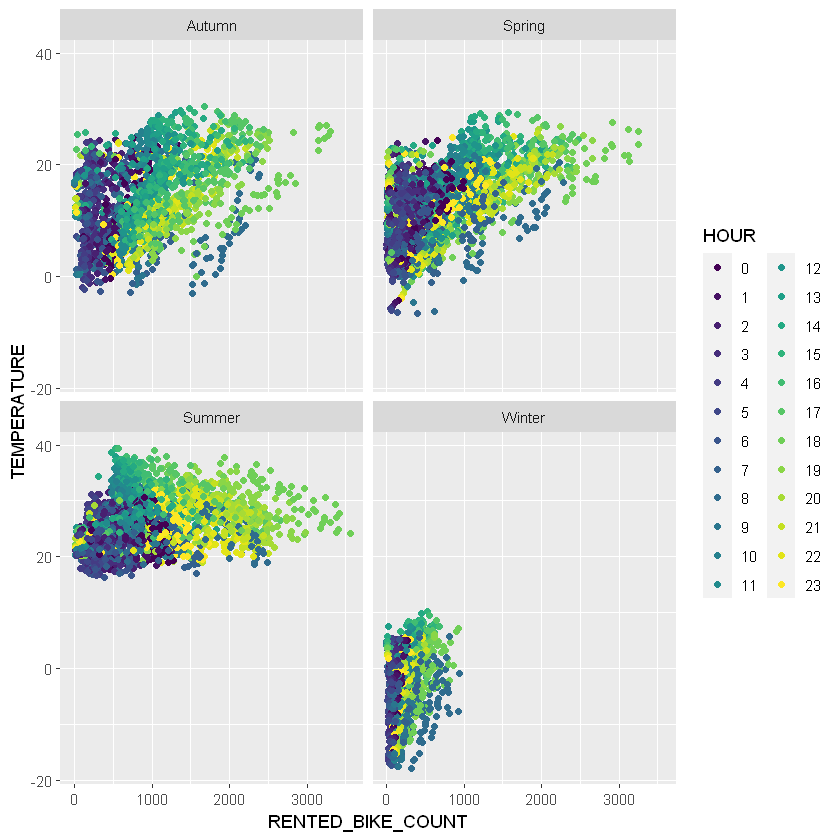

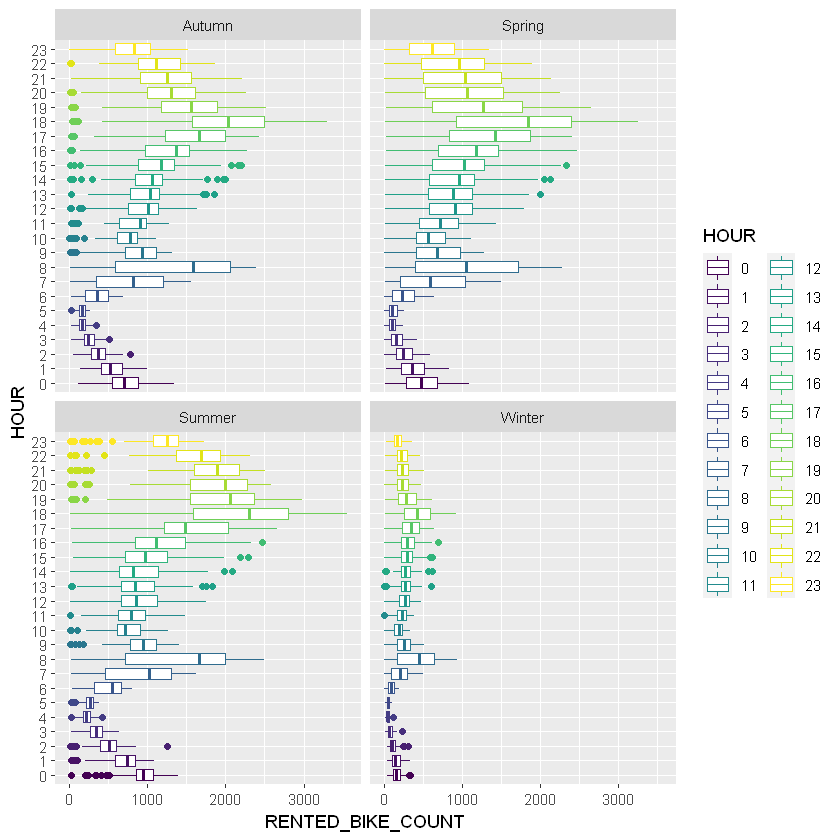

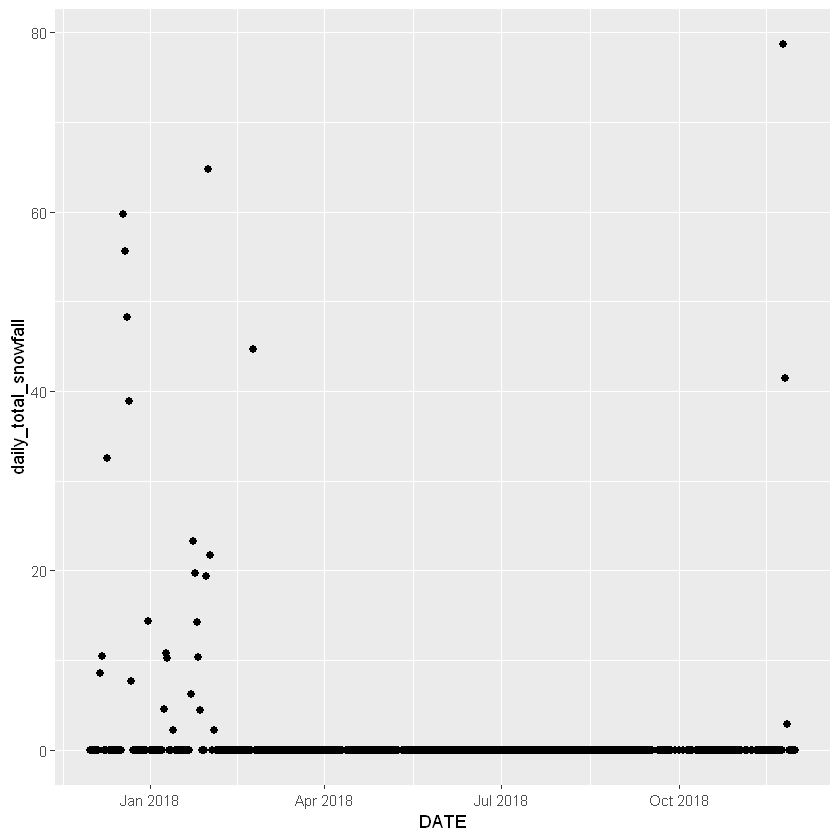

DATE daily_total_rainfall daily_total_snowfall 
                 353                  100                   27

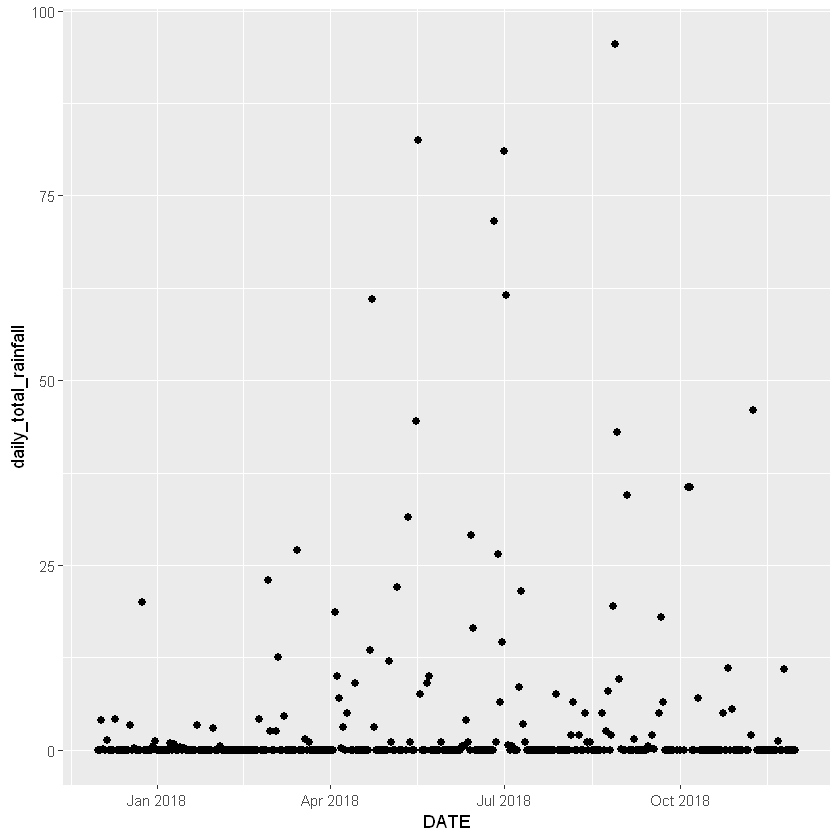

In [14]:
# Data Visualization.
# Grouping the data by SEASONS, and using the summarize() function to calculate the seasonal total rainfall and snowfall.
df = sbs_df %>%  group_by(SEASONS) %>% summarize(sum(RAINFALL),sum(SNOWFALL))  # Creating the new dataframe after grouping
colnames(df) = c('SEASONS','RAINFALL','SNOWFALL') # Renaming the column names.
df # Checking the new dataframe.

# Creating a scatter plot of RENTED_BIKE_COUNT vs DATE.
ggplot(sbs_df,aes(x=DATE,y=RENTED_BIKE_COUNT))+geom_point(alpha=0.5) # Using ggplot2

#Creating the scatter plot of the RENTED_BIKE_COUNT time series, but now add HOURS as the colour.
ggplot(sbs_df,aes(x=DATE,y=RENTED_BIKE_COUNT,color=HOUR))+geom_point(alpha=0.5)

# Creating a histogram overlaid with a kernel density curve.
ggplot(sbs_df,aes(x=RENTED_BIKE_COUNT,y=..density..))+geom_histogram(alpha=10,bins=30)+geom_density()

#Using a scatter plot to visualize the correlation between RENTED_BIKE_COUNT and TEMPERATURE by SEASONS.
ggplot(sbs_df,aes(x=RENTED_BIKE_COUNT,y=TEMPERATURE,color=HOUR))+geom_point()+facet_wrap(~SEASONS) # Using facet_wrap to generate four plots corresponding to the seasons.

# Creating a display of four boxplots of RENTED_BIKE_COUNT vs. HOUR grouped by SEASONS.
# Using facet_wrap to generate four plots corresponding to the seasons.
ggplot(sbs_df,aes(x=RENTED_BIKE_COUNT,y=HOUR,color=HOUR))+geom_boxplot()+facet_wrap(~SEASONS)

# Grouping the data by DATE, and using the summarize() function to calculate the daily total rainfall and snowfall and visualizing it.
de = sbs_df %>% group_by(DATE) %>% summarize(daily_total_rainfall=sum(RAINFALL),daily_total_snowfall=sum(SNOWFALL))
ggplot(de,aes(group=DATE,x=DATE,y=daily_total_snowfall))+geom_point(size=2)
ggplot(de,aes(x=DATE,y=daily_total_rainfall))+geom_point(size=2)

# Determining how many days had snowfall.
colSums(de !=0)

Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + 
    WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + 
    RAINFALL + SNOWFALL, data = data)

Coefficients:
          (Intercept)            TEMPERATURE               HUMIDITY  
              171.735               2356.733               -936.165  
           WIND_SPEED             VISIBILITY  DEW_POINT_TEMPERATURE  
              385.616                  7.808               -275.585  
      SOLAR_RADIATION               RAINFALL               SNOWFALL  
             -441.325              -1789.709                312.055  


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + 
    WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + 
    RAINFALL + SNOWFALL + AUTUMN + SPRING + SUMMER + WINTER + 
    HOLIDAY + NO_HOLIDAY + `0` + `1` + `2` + `3` + `4` + `5` + 
    `6` + `7` + `8` + `9` + `10` + `11` + `12` + `13` + `14` + 
    `15` + `16` + `17` + `18` + `19` + `20`

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"


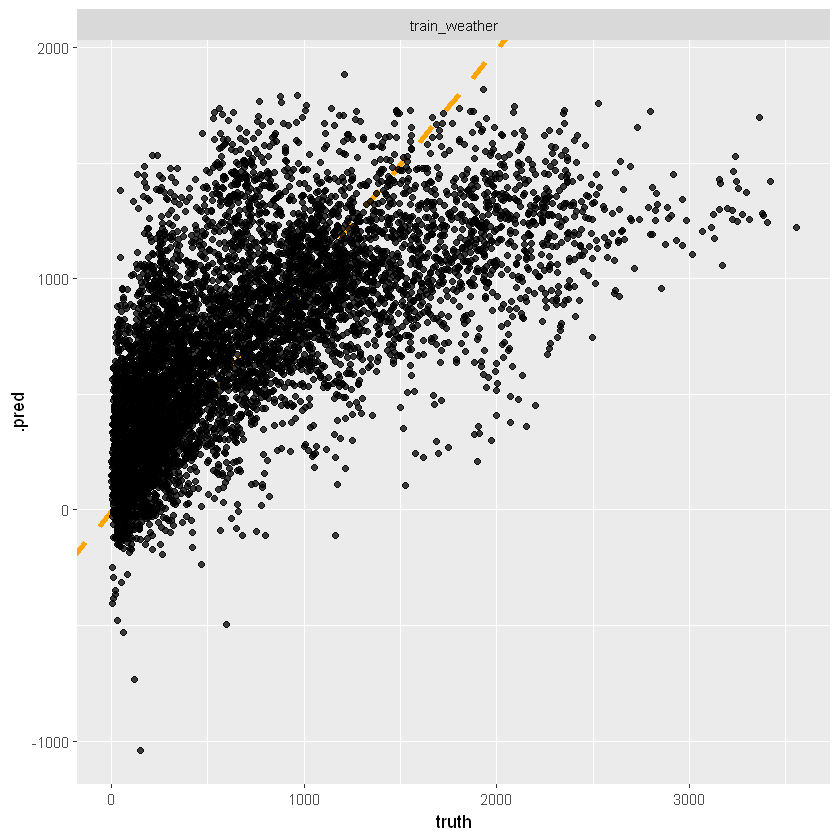

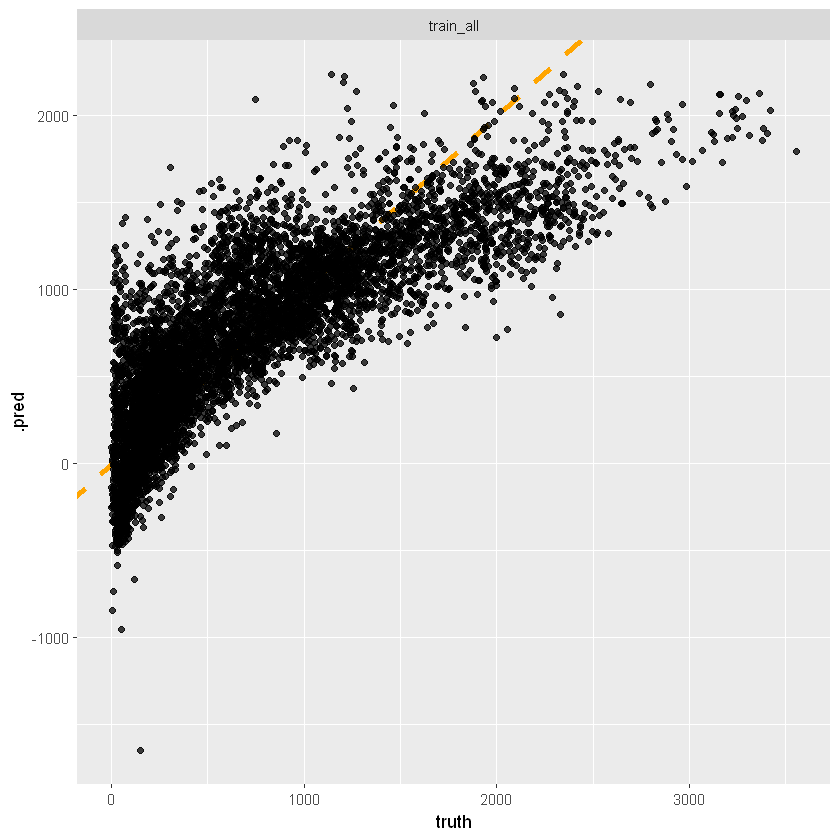

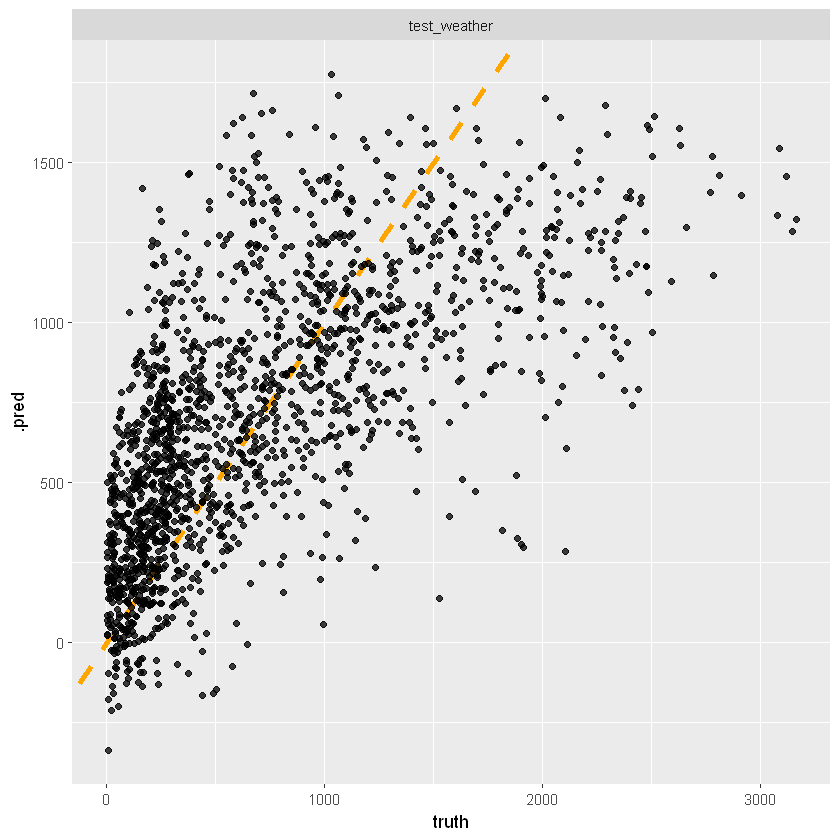

(Intercept)           TEMPERATURE              HUMIDITY 
            315.87957             789.55812            -887.19101 
           WIND_SPEED            VISIBILITY DEW_POINT_TEMPERATURE 
             13.72030              18.19655             602.78561 
      SOLAR_RADIATION              RAINFALL              SNOWFALL 
            271.87454           -2095.11084             230.03879 
               AUTUMN                SPRING                SUMMER 
            355.93811             190.12691             190.24969 
               WINTER               HOLIDAY            NO_HOLIDAY 
                   NA            -124.22867                    NA 
                  `0`                   `1`                   `2` 
           -120.35625            -224.29349            -336.56059 
                  `3`                   `4`                   `5` 
           -419.34951            -483.15520            -462.91546 
                  `6`                   `7`                   `8` 
           -307.37347              12.03911             357.27584 
                  `9`                  `10`                  `11` 
            -96.54557            -332.20239            -344.71362 
                 `12`                  `13`                  `14` 
           -300.96401            -282.37444            -290.73171 
                 `15`                  `16`                  `17` 
           -213.47540             -77.24497             213.24454 
                 `18`                  `19`                  `20` 
            689.26021             423.26303             338.88318 
                 `21`                  `22`                  `23` 
            351.14616             238.07643                    NA

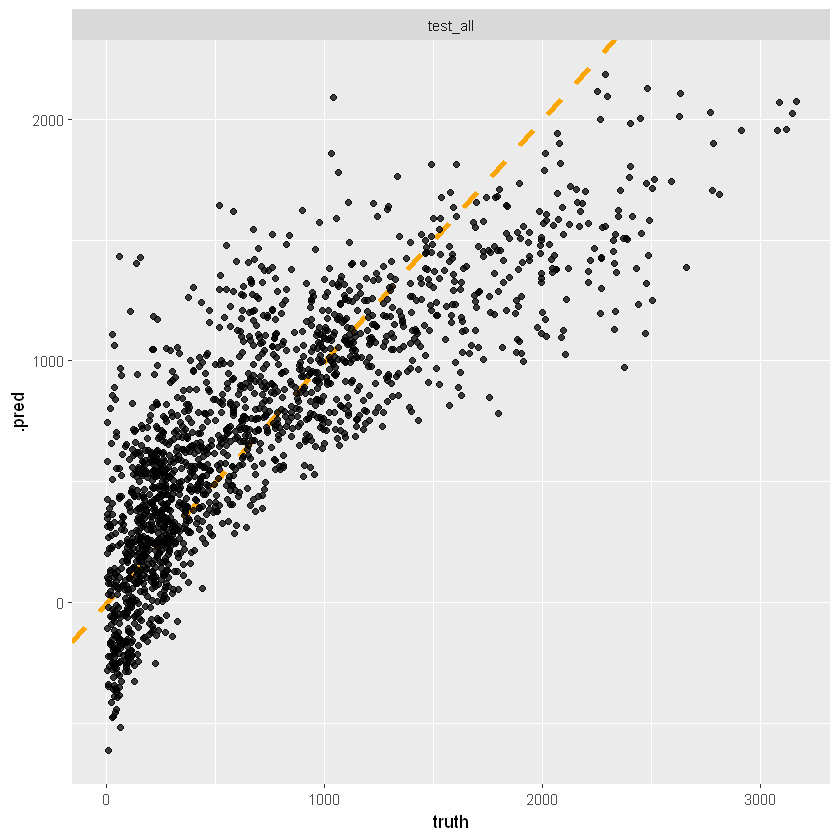

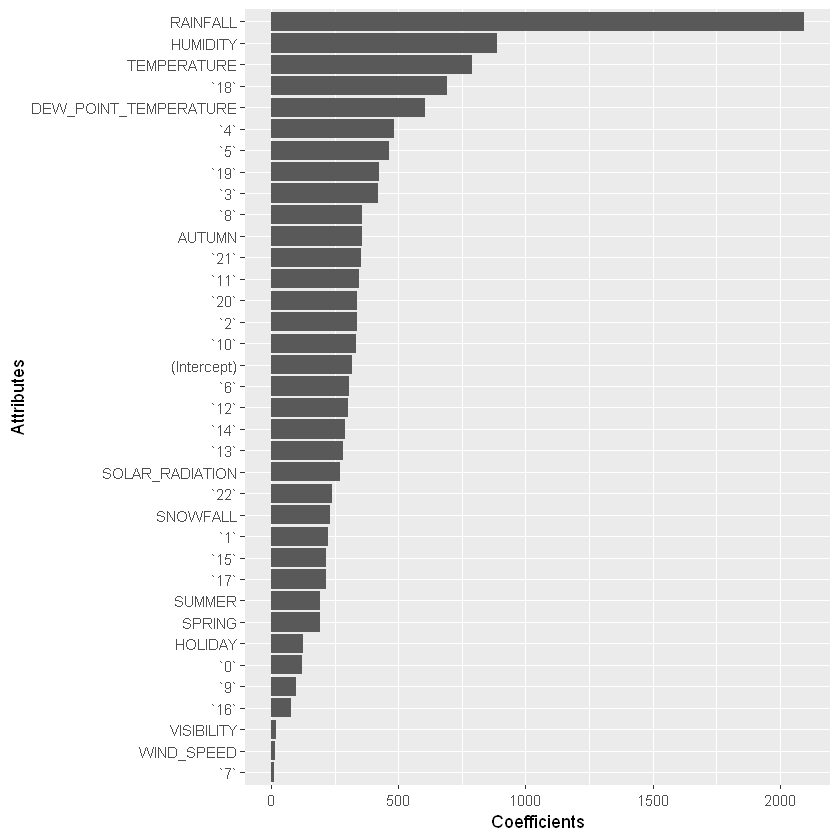

In [40]:
#Value Prediction using Basic Linear Regression Model.

# Acessing Dataset and Speculating the Data.
# dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
# bike_sharing_df <- read_csv(dataset_url)
# spec(bike_sharing_df) #I tried accessing the data using url upon fail I downoaded the file and then read it.
data_dest="C:/Users/rabhi/Downloads/seoul_bike_sharing_converted_normalized (1)"
bike_sharing_df <- read_csv(dataset_url)


# Removing the unwanted columns.
bike_sharing_df = bike_sharing_df %>% select(-DATE, -FUNCTIONING_DAY)

# Using the `initial_split()`, `training()`, and `testing()` functions to split the dataset with seed 1234
set.seed(1234)
data_split = initial_split(bike_sharing_df,prop=0.80)
train_data = training(data_split)
test_data = testing(data_split)

# Using `linear_reg()` with engine `lm` and mode `regression`
lm_model_weather = linear_reg(mode="regression",engine="lm")

# Fitting the model called `lm` with RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL,  with the training data
lm = lm_model_weather %>% fit(RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL,data=train_data)
print(lm$fit) # Prints the coefficents of the variables used in the formula.

# Fitting the model called `lm_all` `RENTED_BIKE_COUNT ~ .` that is use all other variables except for the response variable
lm_all = lm_model_weather %>% fit(RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL+AUTUMN+SPRING+SUMMER+WINTER+HOLIDAY+NO_HOLIDAY+`0`+`1`+`2`+`3`+`4`+`5`+`6`+`7`+`8`+`9`+`10`+`11`+`12`+`13`+`14`+`15`+`16`+`17`+`18`+`19`+`20`+`21`+`22`+`23`,data=train_data)
print(lm_all$fit)

# Use predict() function to generate test results for `lm_model_weather` and `lm_model_all`
# and generate two test results dataframe with a truth column:

# test_results_weather for lm_model_weather model
train_results_weather =  predict(lm,new_data=train_data,interval="confidence") %>% mutate(truth=train_data$RENTED_BIKE_COUNT)
train_results_all =  predict(lm_all,new_data=train_data,interval="confidence") %>% mutate(truth=train_data$RENTED_BIKE_COUNT)
test_results_weather =  predict(lm,new_data=test_data,interval="confidence") %>% mutate(truth=test_data$RENTED_BIKE_COUNT)
test_results_all =  predict(lm_all,new_data=test_data,interval="confidence") %>% mutate(truth=test_data$RENTED_BIKE_COUNT)

# Model Evaluation with visualization.
rsq_weather_test <- rsq(test_results_weather,truth=test_data$RENTED_BIKE_COUNT,estimate=.pred)
rsq_all_test <- rsq(test_results_all,truth=test_data$RENTED_BIKE_COUNT,estimate=.pred)
rmse_weather_test <- rmse(test_results_weather,truth=test_data$RENTED_BIKE_COUNT,estimate=.pred)
rmse_all_test <- rmse(test_results_all,truth=test_data$RENTED_BIKE_COUNT,estimate=.pred)

rsq_weather_train <- rsq(train_results_weather,truth=train_data$RENTED_BIKE_COUNT,estimate=.pred)
rsq_all_train <- rsq(train_results_all,truth=train_data$RENTED_BIKE_COUNT,estimate=.pred)
rmse_weather_train <- rmse(train_results_weather,truth=train_data$RENTED_BIKE_COUNT,estimate=.pred)
rmse_all_train <- rmse(train_results_all,truth=train_data$RENTED_BIKE_COUNT,estimate=.pred)

train_results_weather %>% mutate(train="train_weather") %>% bind_rows(train_results_weather %>% mutate(train="train_weather")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
train_results_all %>% mutate(train="train_all") %>% bind_rows(train_results_all %>% mutate(train="train_all")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
test_results_weather %>% mutate(train="test_weather") %>% bind_rows(test_results_weather %>% mutate(train="test_weather")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
test_results_all %>% mutate(train="test_all") %>% bind_rows(test_results_all %>% mutate(train="test_all")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
#From the visualization we can observe that lm_all model gives us more accurate prediction.

#Printing the Coefficients of the lm_all.
lm_all$fit$coefficients

# Sorting coefficient list and visualizing the same.
list_coff=lm_all$fit$coefficients
Attributes = names(list_coff)
Coefficients= abs(list_coff)

sort_coeff = data.frame(Attributes,Coefficients)
sort_coeff = sort_coeff %>% drop_na("Coefficients")
sort_coeff = sort_coeff[order(sort_coeff$Coefficients,decreasing=TRUE),]
sort_coeff$Attributes = factor(sort_coeff$Attributes) %>% fct_reorder(sort_coeff$Coefficients)

ggplot(sort_coeff,aes(x=Attributes,y=Coefficients))+geom_col()+coord_flip()

Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ poly(HUMIDITY, 3) + poly(TEMPERATURE, 
    3) + poly(DEW_POINT_TEMPERATURE, 3) + RAINFALL, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1249.60  -268.94   -59.71   175.68  2260.69 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        738.612      5.621 131.409  < 2e-16 ***
poly(HUMIDITY, 3)1               -1513.602   2241.890  -0.675  0.49961    
poly(HUMIDITY, 3)2               -8845.675    603.017 -14.669  < 2e-16 ***
poly(HUMIDITY, 3)3               -1643.279    505.376  -3.252  0.00115 ** 
poly(TEMPERATURE, 3)1            63762.476   4699.907  13.567  < 2e-16 ***
poly(TEMPERATURE, 3)2             1638.238    838.470   1.954  0.05076 .  
poly(TEMPERATURE, 3)3           -11530.337    612.324 -18.830  < 2e-16 ***
poly(DEW_POINT_TEMPERATURE, 3)1 -37244.600   5541.114  -6.722 1.95e-11 ***
poly(DEW_POINT_TEMPERATURE, 3)2  -9716.311    854.753 -

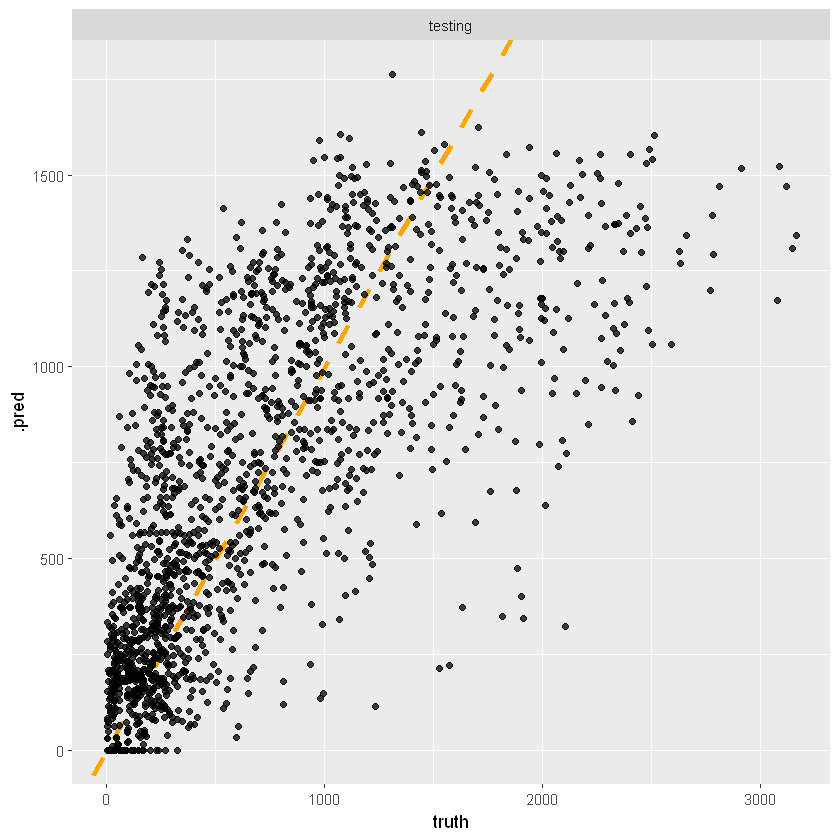

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"


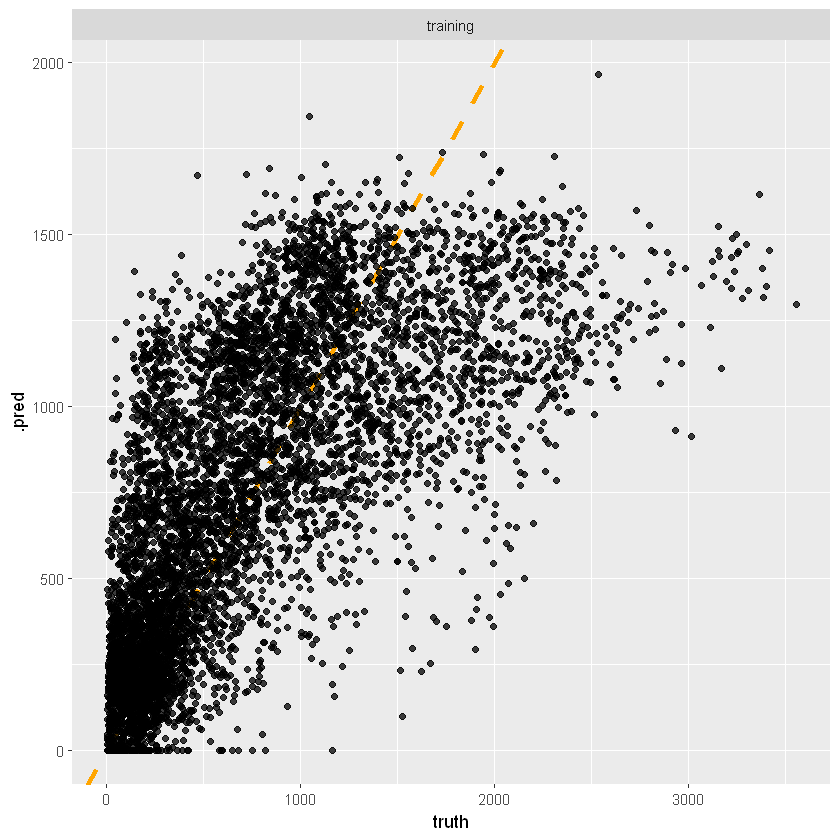

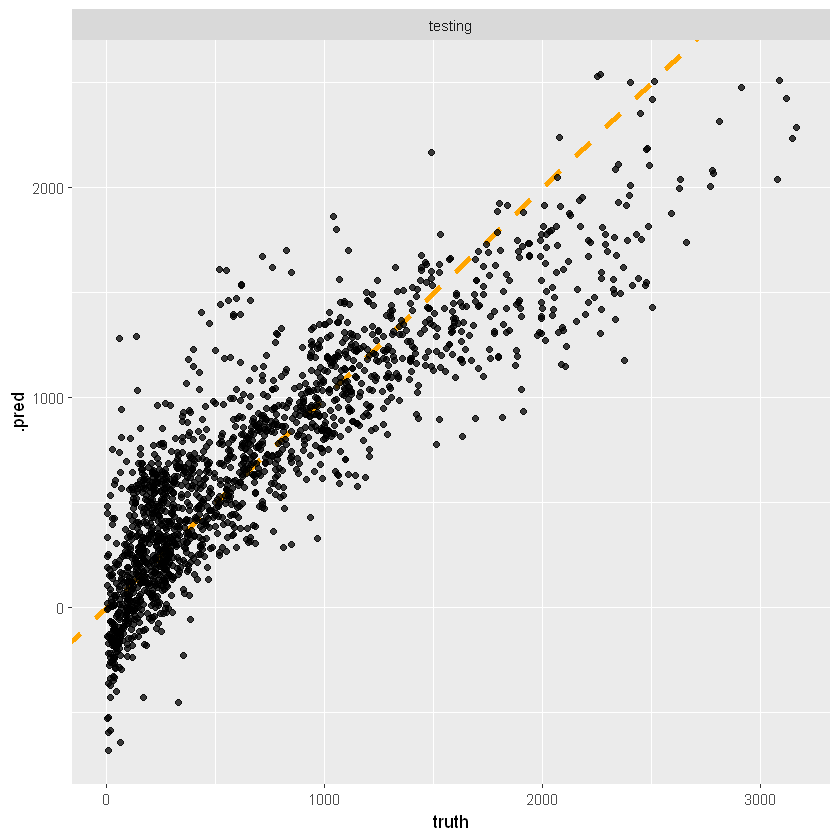

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"


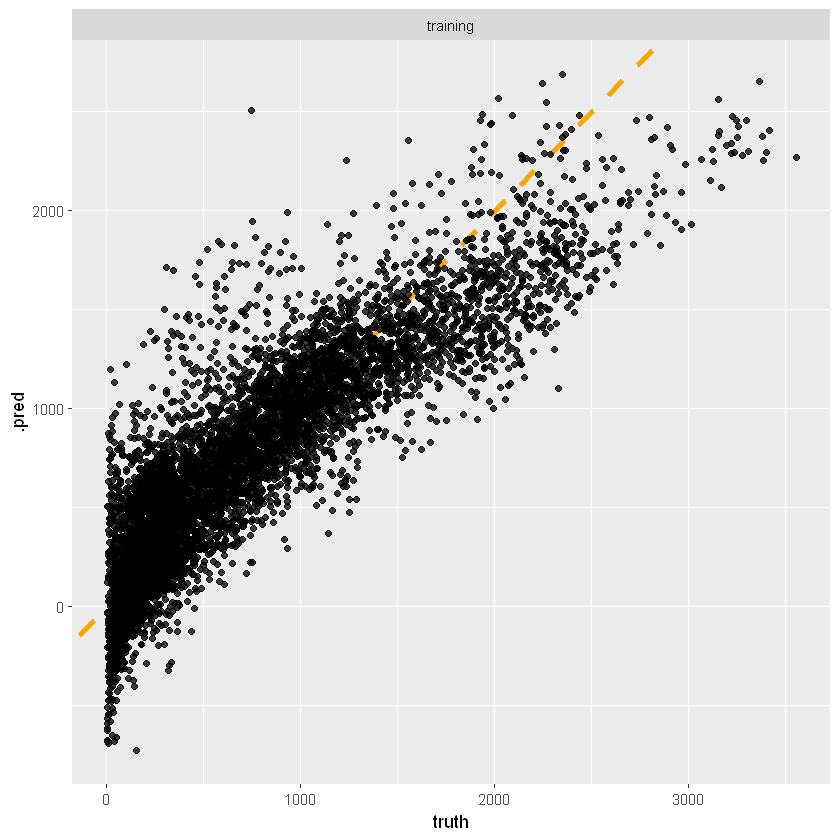

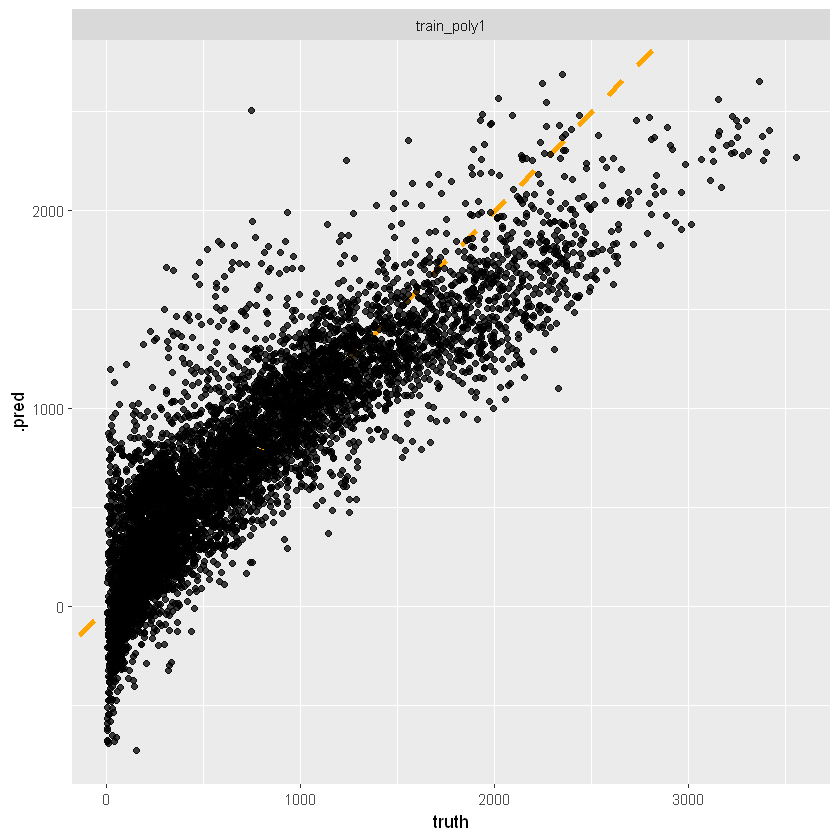

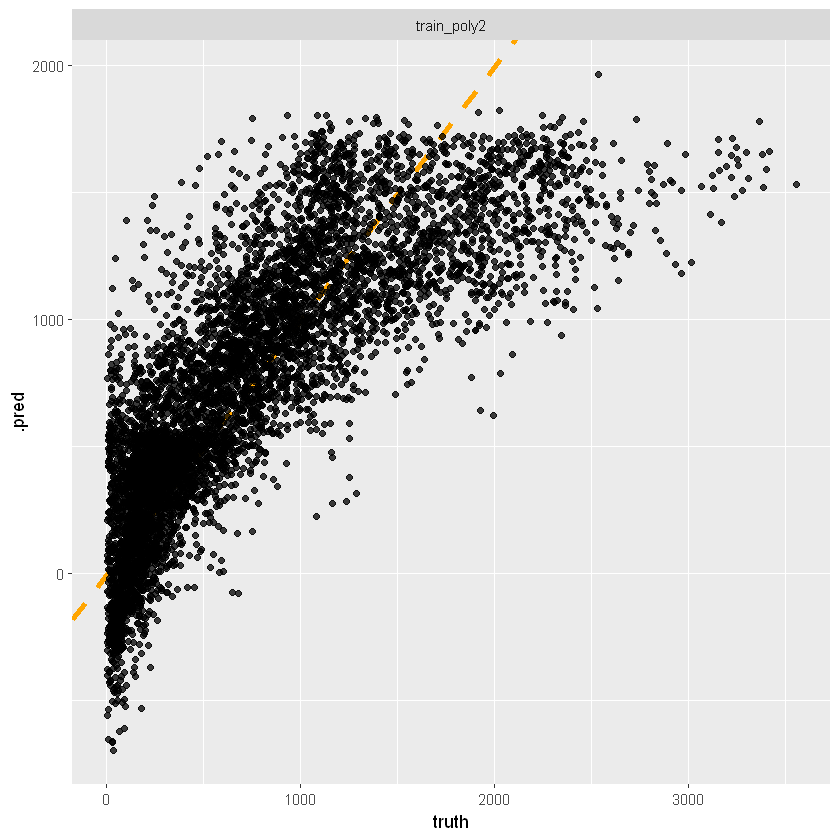

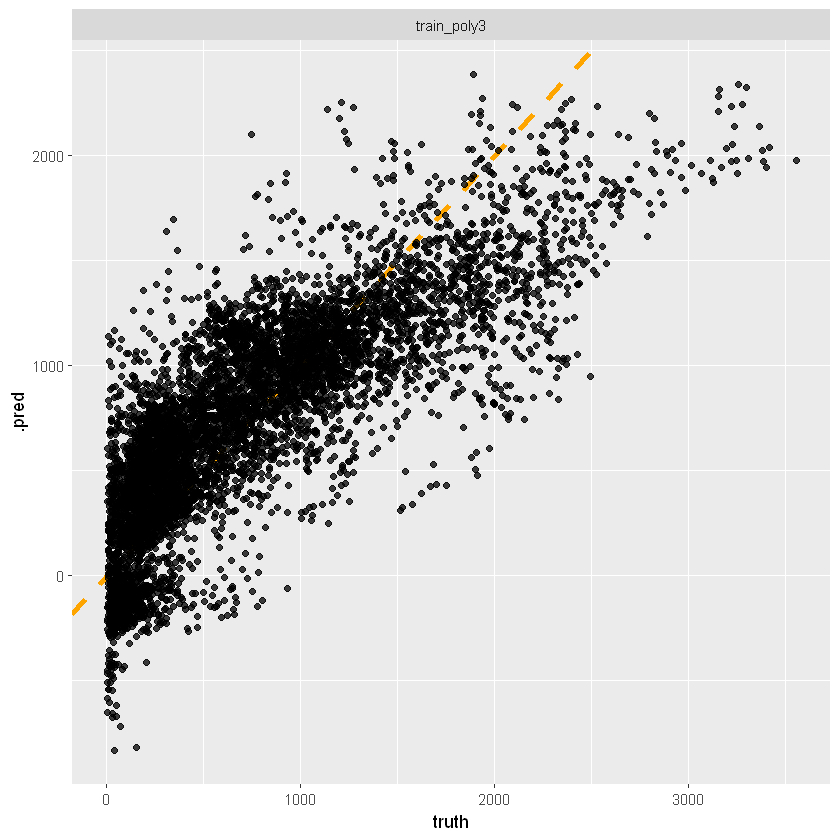

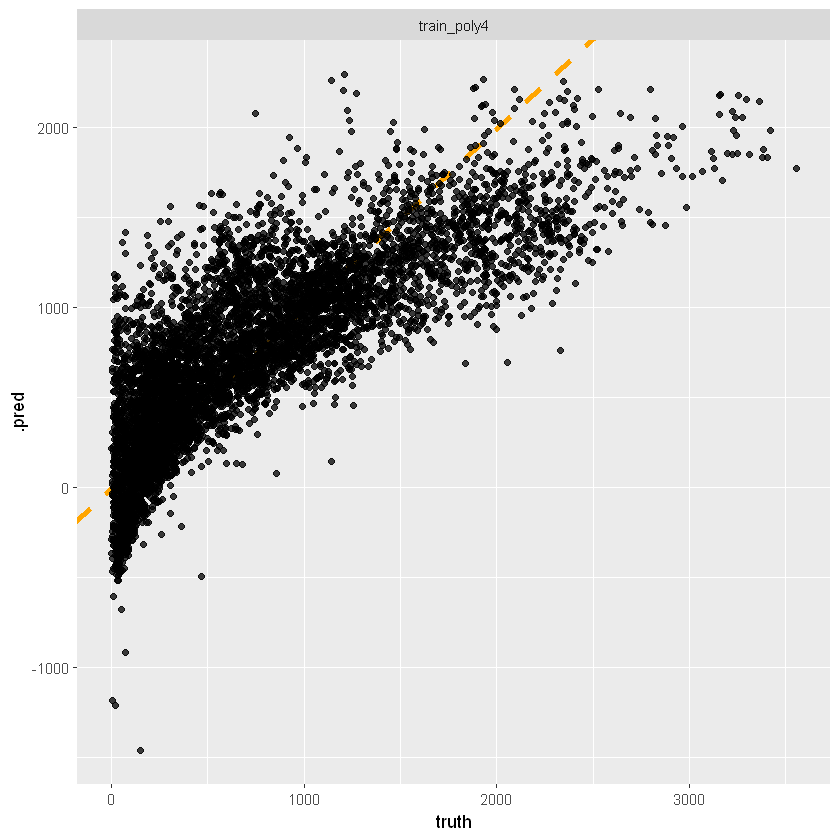

[1] 0.7676687

[1] 310.6647

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"


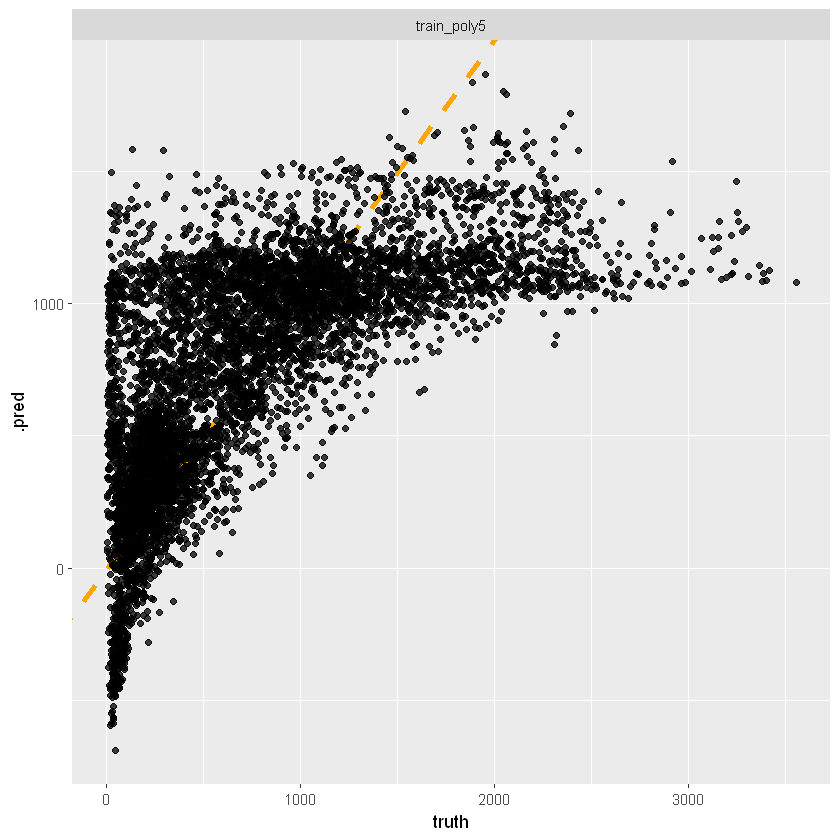

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
"prediction from a rank-deficient fit may be misleading"


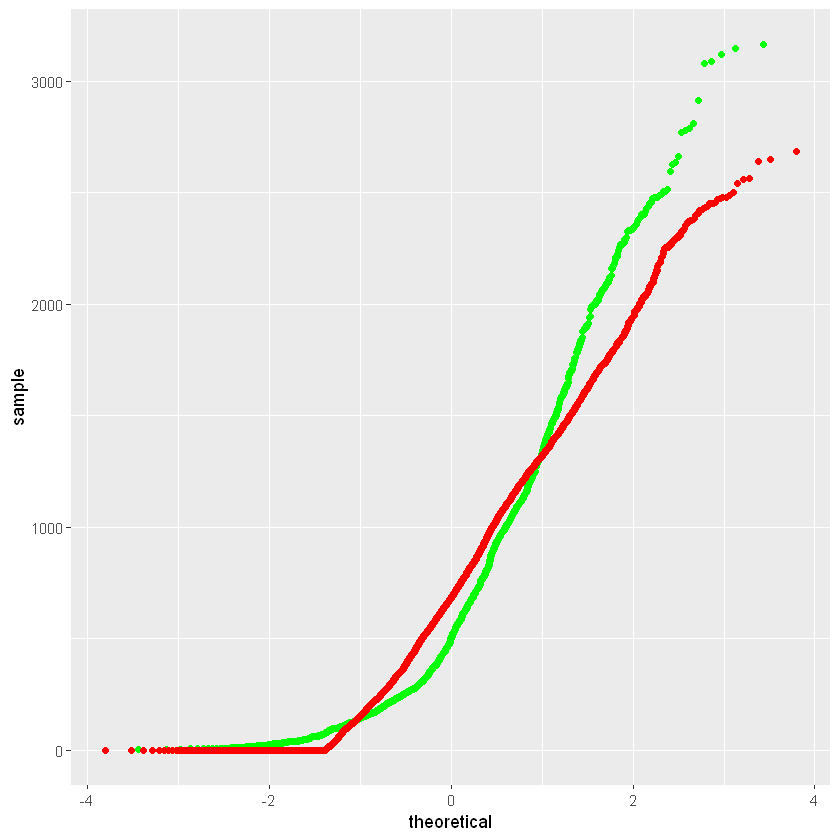

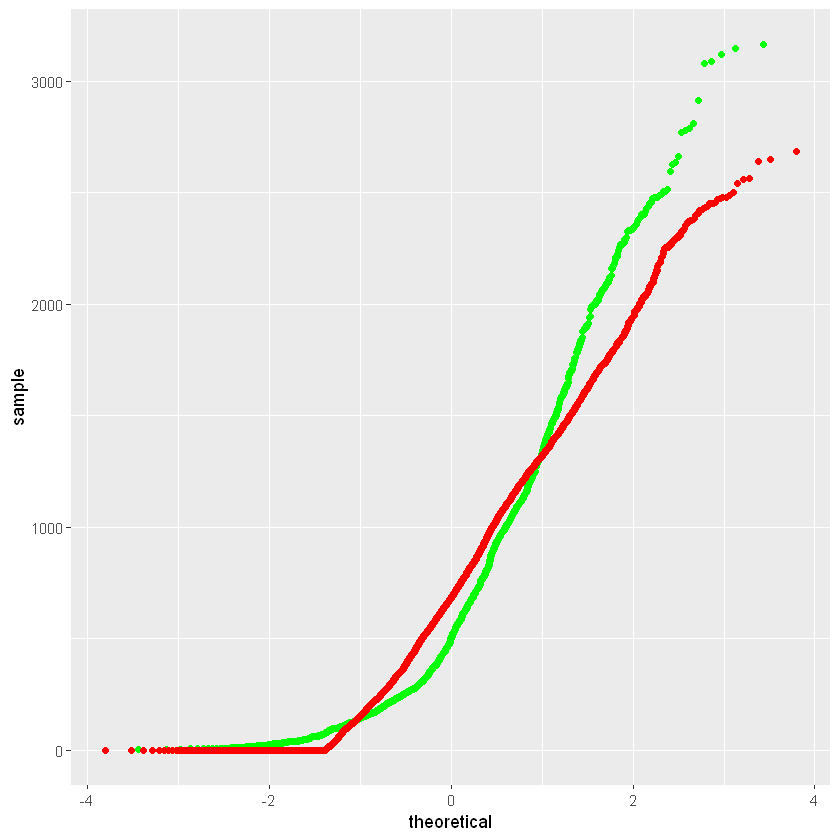

In [43]:
# Refining Baseline Regression Models.

# Accessing Dataset using URL.
# dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
# bike_sharing_df <- read_csv(dataset_url)
# spec(bike_sharing_df) #I tried accessing the data using url upon fail I downoaded the file and then read it.
data_dest="C:/Users/rabhi/Downloads/seoul_bike_sharing_converted_normalized (1)"
bike_sharing_df <- read_csv(dataset_url)

# Removing the character columns.
bike_sharing_df = bike_sharing_df %>% select(-DATE, -FUNCTIONING_DAY)

# Defining the linear regression model specification.
lm_spec = linear_reg() %>%set_engine("lm") %>% set_mode("regression")

# Splitting the data into training and testing datasets.
set.seed(1234)
data_split = initial_split(bike_sharing_df, prop = 4/5)
train_data = training(data_split)
test_data = testing(data_split)

# Fitting a linear model with higher order polynomial on some important variables 
lm_poly = RENTED_BIKE_COUNT ~ poly(HUMIDITY,3)+poly(TEMPERATURE,3)+poly(DEW_POINT_TEMPERATURE,3)+RAINFALL
try_mod1 = lm_spec %>% fit(lm_poly,data=train_data)

# Printing model summary.
summary(try_mod1$fit)

# Using predict() function to generate test results for `lm_poly`
test_poly = predict(try_mod1,new_data=test_data,interval="confidence") %>% mutate(truth=test_data$RENTED_BIKE_COUNT)
train_poly = predict(try_mod1,new_data=train_data,interval="confidence")  %>% mutate(truth=train_data$RENTED_BIKE_COUNT)

# Coverting all negetive predictions into zero.
 test_poly[test_poly<0] <- 0
 train_poly[train_poly<0] <- 0

# Finding RSQ and RMSE values for the polynomial.
rsq_poly_train <- rsq(train_poly,truth=train_data$RENTED_BIKE_COUNT,estimate=.pred)
rmse_poly_train <- rmse(train_poly,truth=train_data$RENTED_BIKE_COUNT,estimate=.pred)
rsq_poly_test <- rsq(test_poly,truth=test_data$RENTED_BIKE_COUNT,estimate=.pred)
rmse_poly_test <- rmse(test_poly,truth=test_data$RENTED_BIKE_COUNT,estimate=.pred)
test_poly %>% mutate(train="testing") %>% bind_rows(test_poly %>% mutate(train="testing")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
train_poly %>% mutate(train="training") %>% bind_rows(train_poly %>% mutate(train="training")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)

# Adding Interaction Terms and visualizing.
lm_poly1 = RENTED_BIKE_COUNT ~ poly(HUMIDITY,6)+poly(TEMPERATURE,6)+poly(DEW_POINT_TEMPERATURE,6)+poly(RAINFALL,6)+poly(SNOWFALL,6)+poly(SNOWFALL,7)+poly(SOLAR_RADIATION,6)+AUTUMN*TEMPERATURE+RAINFALL*HUMIDITY+HOLIDAY*SUMMER+HOLIDAY*SPRING+WINTER*SNOWFALL+SUMMER*TEMPERATURE+SPRING*TEMPERATURE+WINTER+AUTUMN+SUMMER+SPRING+HOLIDAY+WIND_SPEED+VISIBILITY+`0`+`1`+`2`+`3`+`4`+`5`+`6`+`7`+`8`+`9`+`10`+`11`+`12`+`13`+`14`+`15`+`16`+`17`+`18`+`19`+`20`+`21`+`22`+`23`

mod1 = lm_spec %>% fit(lm_poly1,data=train_data)

test_poly1 = predict(mod1,new_data=test_data,interval="confidence") %>% mutate(truth=test_data$RENTED_BIKE_COUNT)
train_poly1 = predict(mod1,new_data=train_data,interval="confidence")  %>% mutate(truth=train_data$RENTED_BIKE_COUNT)

rsq_poly_train1 <- rsq(train_poly1,truth=train_data$RENTED_BIKE_COUNT,estimate=.pred)
rmse_poly_train1 <- rmse(train_poly1,truth=train_data$RENTED_BIKE_COUNT,estimate=.pred)
rsq_poly_test1 <- rsq(test_poly1,truth=test_data$RENTED_BIKE_COUNT,estimate=.pred)
rmse_poly_test1 <- rmse(test_poly1,truth=test_data$RENTED_BIKE_COUNT,estimate=.pred)
test_poly1 %>% mutate(train="testing") %>% bind_rows(test_poly1 %>% mutate(train="testing")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
train_poly1 %>% mutate(train="training") %>% bind_rows(train_poly1 %>% mutate(train="training")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)

# Building at least five different models using polynomial terms, interaction terms, and regularizations.

lm_poly1 = RENTED_BIKE_COUNT ~ poly(HUMIDITY,6)+poly(TEMPERATURE,6)+poly(DEW_POINT_TEMPERATURE,6)+poly(RAINFALL,6)+poly(SNOWFALL,6)+poly(SNOWFALL,7)+poly(SOLAR_RADIATION,6)+AUTUMN*TEMPERATURE+RAINFALL*HUMIDITY+HOLIDAY*SUMMER+HOLIDAY*SPRING+WINTER*SNOWFALL+SUMMER*TEMPERATURE+SPRING*TEMPERATURE+WINTER+AUTUMN+SUMMER+SPRING+HOLIDAY+WIND_SPEED+VISIBILITY+`0`+`1`+`2`+`3`+`4`+`5`+`6`+`7`+`8`+`9`+`10`+`11`+`12`+`13`+`14`+`15`+`16`+`17`+`18`+`19`+`20`+`21`+`22`+`23`

lm_poly2 = RENTED_BIKE_COUNT ~ poly(HUMIDITY,6)+poly(TEMPERATURE,6)+poly(DEW_POINT_TEMPERATURE,6)+SUMMER*TEMPERATURE+SPRING*TEMPERATURE+WINTER+AUTUMN+SUMMER+SPRING+HOLIDAY+WIND_SPEED+VISIBILITY+`0`+`1`+`2`+`3`+`4`+`5`+`6`+`7`+`8`+`9`+`10`+`11`

lm_poly3 = RENTED_BIKE_COUNT ~ poly(RAINFALL,6)+poly(SNOWFALL,6)+poly(SNOWFALL,7)+poly(SOLAR_RADIATION,6)+AUTUMN*TEMPERATURE+RAINFALL*HUMIDITY+HOLIDAY*SUMMER+HOLIDAY*SPRING+WINTER*SNOWFALL+`12`+`13`+`14`+`15`+`16`+`17`+`18`+`19`+`20`+`21`+`22`+`23`

lm_poly4 = RENTED_BIKE_COUNT ~ AUTUMN*TEMPERATURE+RAINFALL*HUMIDITY+WIND_SPEED+VISIBILITY+`0`+`1`+`2`+`3`+`4`+`5`+`6`+`7`+`8`+`9`+`10`+`11`+`12`+`13`+`14`+`15`+`16`+`17`+`18`+`19`+`20`+`21`+`22`+`23`

lm_poly5 = RENTED_BIKE_COUNT ~ HOLIDAY*SUMMER+HOLIDAY*SPRING+WINTER*SNOWFALL+SUMMER*TEMPERATURE+SPRING*TEMPERATURE+WINTER+AUTUMN+SUMMER+SPRING+HOLIDAY+`13`+`14`+`15`+`16`+`17`+`4`+`5`+`6`+`7`+`8`+`9`+`10`

mod1 = lm_spec %>% fit(lm_poly1,data=train_data)
mod2 = lm_spec %>% fit(lm_poly2,data=train_data)
mod3 = lm_spec %>% fit(lm_poly3,data=train_data)
mod4 = lm_spec %>% fit(lm_poly4,data=train_data)
mod5 = lm_spec %>% fit(lm_poly5,data=train_data)

train_poly1 = predict(mod1,new_data=train_data,interval="confidence")  %>% mutate(truth=train_data$RENTED_BIKE_COUNT)
train_poly2 = predict(mod2,new_data=train_data,interval="confidence")  %>% mutate(truth=train_data$RENTED_BIKE_COUNT)
train_poly3 = predict(mod3,new_data=train_data,interval="confidence")  %>% mutate(truth=train_data$RENTED_BIKE_COUNT)
train_poly4 = predict(mod4,new_data=train_data,interval="confidence")  %>% mutate(truth=train_data$RENTED_BIKE_COUNT)
train_poly5 = predict(mod5,new_data=train_data,interval="confidence")  %>% mutate(truth=train_data$RENTED_BIKE_COUNT)


rsq1 = rsq(train_poly1,truth=truth,estimate=.pred)
rsq2 = rsq(train_poly2,truth=truth,estimate=.pred)
rsq3 = rsq(train_poly3,truth=truth,estimate=.pred)
rsq4 = rsq(train_poly4,truth=truth,estimate=.pred)
rsq5 = rsq(train_poly5,truth=truth,estimate=.pred)

rmse1 = rmse(train_poly1,truth=truth,estimate=.pred)
rmse2 = rmse(train_poly2,truth=truth,estimate=.pred)
rmse3 = rmse(train_poly3,truth=truth,estimate=.pred)
rmse4 = rmse(train_poly4,truth=truth,estimate=.pred)
rmse5 = rmse(train_poly5,truth=truth,estimate=.pred)

train_poly1 %>% mutate(train="train_poly1") %>% bind_rows(train_poly1 %>% mutate(train="train_poly1")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
train_poly2 %>% mutate(train="train_poly2") %>% bind_rows(train_poly2 %>% mutate(train="train_poly2")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
train_poly3 %>% mutate(train="train_poly3") %>% bind_rows(train_poly3 %>% mutate(train="train_poly3")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
train_poly4 %>% mutate(train="train_poly4") %>% bind_rows(train_poly4 %>% mutate(train="train_poly4")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
train_poly5 %>% mutate(train="train_poly5") %>% bind_rows(train_poly5 %>% mutate(train="train_poly5")) %>% ggplot(aes(truth,.pred))+geom_abline(lty=2,color="orange",size=1.5)+geom_point(alpha=0.5)+facet_wrap(~train)
# After looking at the visualizations we can conculde that polynomial formual 1 gives out the best predictions.

# Reporting the best performed model in terms of rmse and rsq
max(rsq1$.estimate,rsq2$.estimate,rsq3$.estimate,rsq4$.estimate,rsq5$.estimate)
min(rmse1$.estimate,rmse2$.estimate,rmse3$.estimate,rmse4$.estimate,rmse5$.estimate)

#Creating a Q-Q plot by plotting the distribution difference between the predictions generated by your best model and the true values on the test dataset.
train_poly1 = predict(mod1,new_data=train_data,interval="confidence") 
train_poly1[train_poly1 < 0] = 0 #removing negetive predictions.
ggplot() +
    stat_qq(aes(sample=test_data$RENTED_BIKE_COUNT), color='green') +
    stat_qq(aes(sample=train_poly1$.pred), color='red')